Amare Diotte
SBA 343 & 344 - Data Analysis and visualization with Python
Part 1 - Create Visualizations using Matplotlib, Seaborn & Folium

In [ ]:
%pip install seaborn
%pip install folium

### Importing Required Libraries



In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium as folium
from urllib.request import urlopen 
import json 


---


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [3]:
# load csv to dataframe
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# load geo data to JSON
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
  
# store the response of URL 
response = urlopen(url) 
data_json = json.load(response)


In [18]:
df["Vehicle_Type"]

0        Supperminicar
1        Supperminicar
2      Mediumfamilycar
3        Supperminicar
4      Smallfamiliycar
            ...       
523       Executivecar
524    Smallfamiliycar
525             Sports
526    Smallfamiliycar
527    Smallfamiliycar
Name: Vehicle_Type, Length: 528, dtype: object

---


# Setting global variables & canvas:

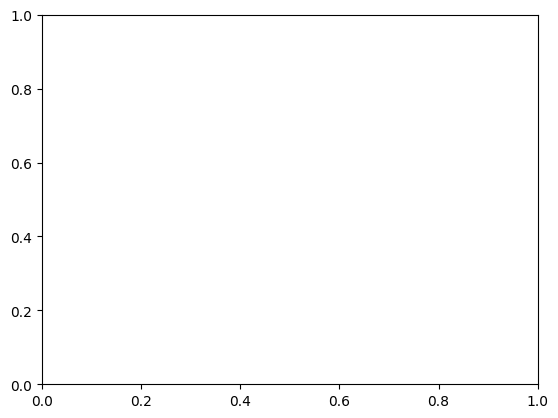

In [5]:
# complete list of years
year_range = [x for x in range(1980,2024)]

# list of years in recession
# if the year has majority months where recession = True, it is included in this list
years_in_recession = df.groupby('Year')['Recession'].median()
years_in_recession = years_in_recession[years_in_recession == 1].index.to_list()

# setting up a canvas
fig, ax = plt.subplots()


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


<details><summary>Click here for a hint</summary>

<p>
You will require:-
<br>to group the year and calculate the average on the 'Automobile Sales', as the data has years and months column
<br>make use of .plot() with kind = 'line'
<br>donot forget to include labels and title
</details>


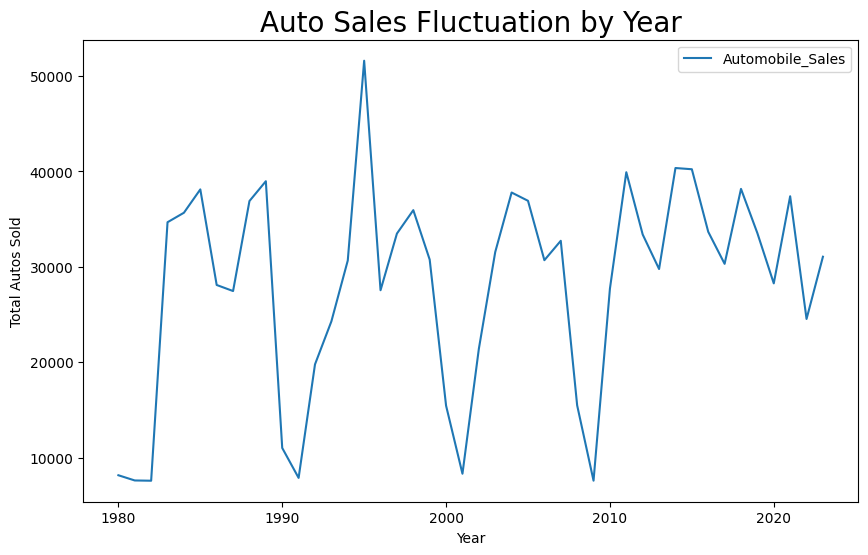

In [6]:
# create data frame taking average of auto sales by year
df_sales_by_year = df.groupby("Year")["Automobile_Sales"].sum().reset_index()

# plot
ax = df_sales_by_year.plot(kind="line", x='Year', y="Automobile_Sales", figsize=(10,6))

# update axes
ax.set_xlabel("Year")
ax.set_ylabel("Total Autos Sold")
ax.set_title("Auto Sales Fluctuation by Year", fontdict={"fontsize":20})

plt.show()


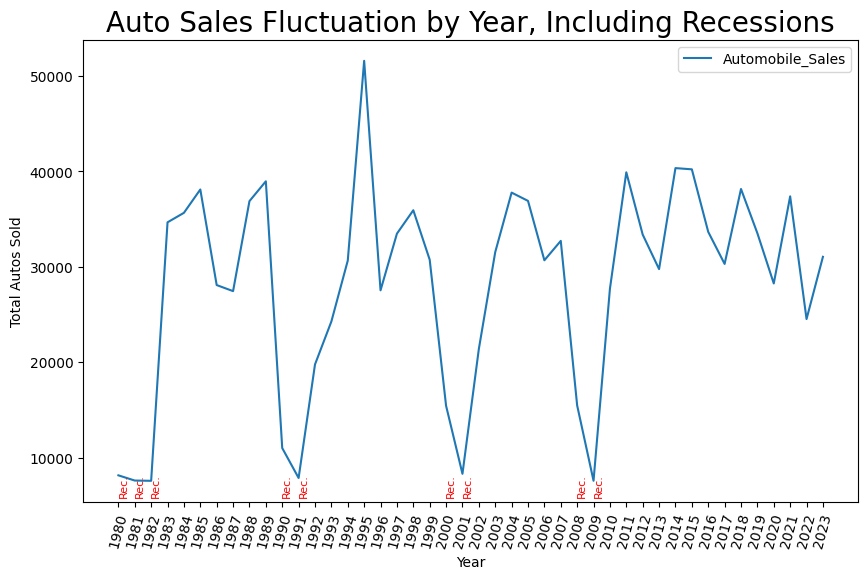

In [7]:
# using same dataframe as the previous graph
ax = df_sales_by_year.plot(kind="line", x="Year", y="Automobile_Sales", figsize=(10,6), xticks=year_range, rot=75)

ax.set_xlabel("Year")
ax.set_ylabel("Total Autos Sold")
ax.set_title("Auto Sales Fluctuation by Year, Including Recessions", fontdict={"fontsize":20})

# years_in_recession is a list contain all years with an active recession
# add annotaton to any k/v pair within a recession year
for k,v in df_sales_by_year.iterrows():
    if v.Year in years_in_recession:
        ax.text(v.Year, 6000, "Rec.", fontdict={"rotation": 90, "fontsize": 8, "color": "r"})




---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


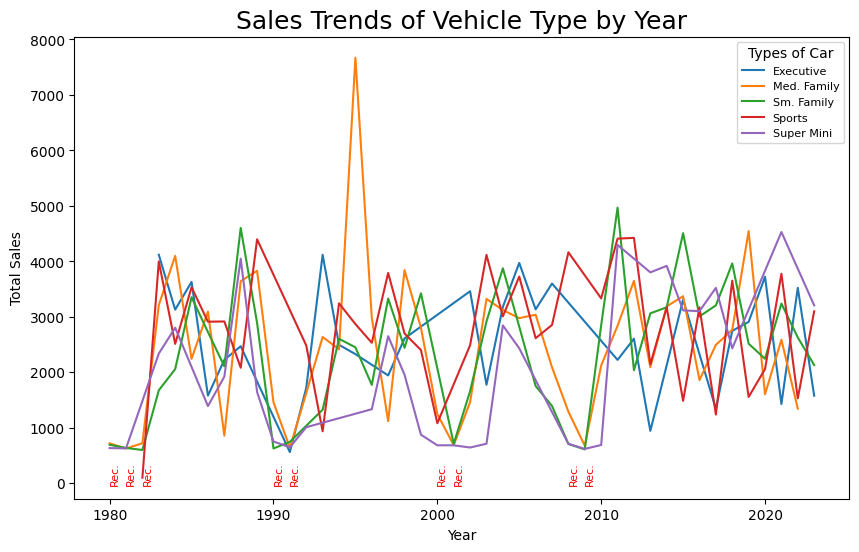

In [15]:
# create a dataframe showing average auto sales grouped by year and type of vehicle
df_vehicle_year = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# make the year the index
df_vehicle_year.set_index("Year", inplace=True)

# group again by vehicle type, year is preserved as an index
df_vehicle_year = df_vehicle_year.groupby('Vehicle_Type')['Automobile_Sales']

# plot lines for each vehicle type
ax = df_vehicle_year.plot(
    kind='line', 
    figsize=(10,6), 
    xlabel="Year", 
    ylabel="Total Sales",
    legend=True)

# update axes
plt.legend(
    ["Executive", "Med. Family", "Sm. Family", "Sports", "Super Mini"], 
    prop={"size": 8} , 
    title="Types of Car")
    
plt.title(
    "Sales Trends of Vehicle Type by Year", 
    fontdict={"size":18})

# add annotations to show recession years
for k,v in df_sales_by_year.iterrows():
    if v.Year in years_in_recession:
        plt.text(v.Year, 0, "Rec.", fontdict={"rotation": 90, "fontsize": 8, "color": "r"})



#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


Car sales plummet during recessions in general.
Executive car sales seem a little more steady than other categories
Super Minis vary the most and appear to be lowest during recessions.
The medium family car follows the same pattern with the recession. there is a big spike of sales in the mid 90s
Small family car sales are very low during recessions but consistently a top seller during other times
sport car sales don't drop quite as much during recessions, but there are times of low sales in non recession years.


----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


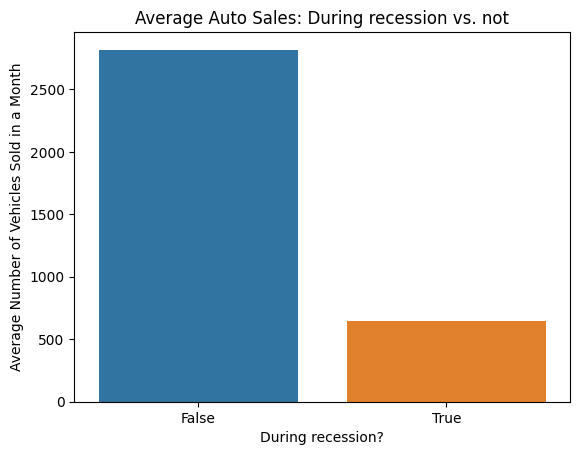

In [16]:
# create a data frame that groups by recession/no recession, find average sales
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# create seaborn plot
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df, legend=False)

# update axes
plt.xlabel("During recession?")
plt.ylabel("Average Number of Vehicles Sold in a Month")
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.title("Average Auto Sales: During recession vs. not")

plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period
<br>We recommend that you use the functionality of **Seaborn Library** to create this visualization


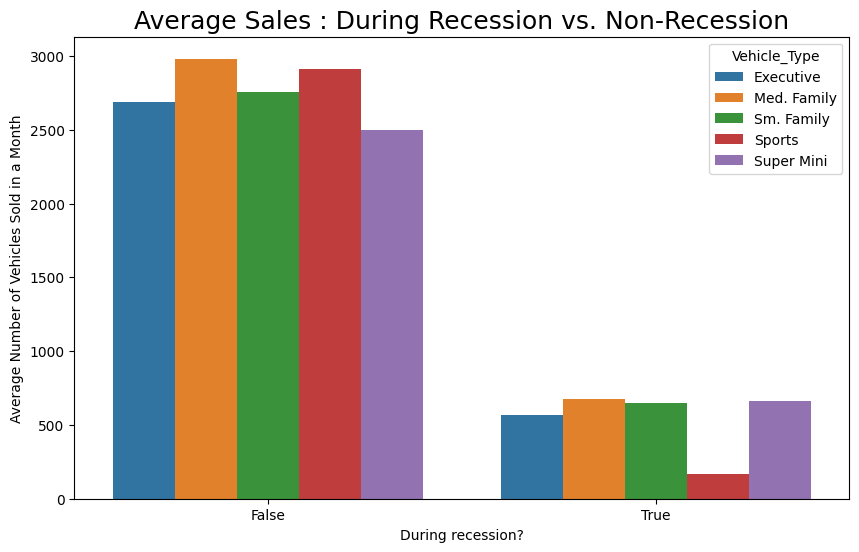

In [24]:
# group new dataframe by both recession and vehicle type, once again get average sales
df_rv = df.groupby(["Recession", "Vehicle_Type"])["Automobile_Sales"].mean().reset_index()
df_rv.replace(to_replace={"Executivecar": "Executive", "Mediumfamilycar": "Med. Family",  "Smallfamiliycar":"Sm. Family", "Sports": "Sports", "Supperminicar": "Super Mini"}, inplace=True)
# made this one a little bigger so the legend would fit
fig = plt.figure(figsize=(10,6))

# make seaborn plot
sns.barplot(x="Recession", y="Automobile_Sales", hue="Vehicle_Type", data=df_rv)

# update axes
plt.xlabel("During recession?")
plt.ylabel("Average Number of Vehicles Sold in a Month")
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.title(
    "Average Sales : During Recession vs. Non-Recession", 
    fontdict={"size":18})
plt.show()



### From the above chart what insights have you gained on the overall sales of automobiles during recession?


Car sales are much lower during a regression. Sport car sales are noticeably lower during recession times than the other vehicle types. They are the second highest care type sold when there is NOT a recession.

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


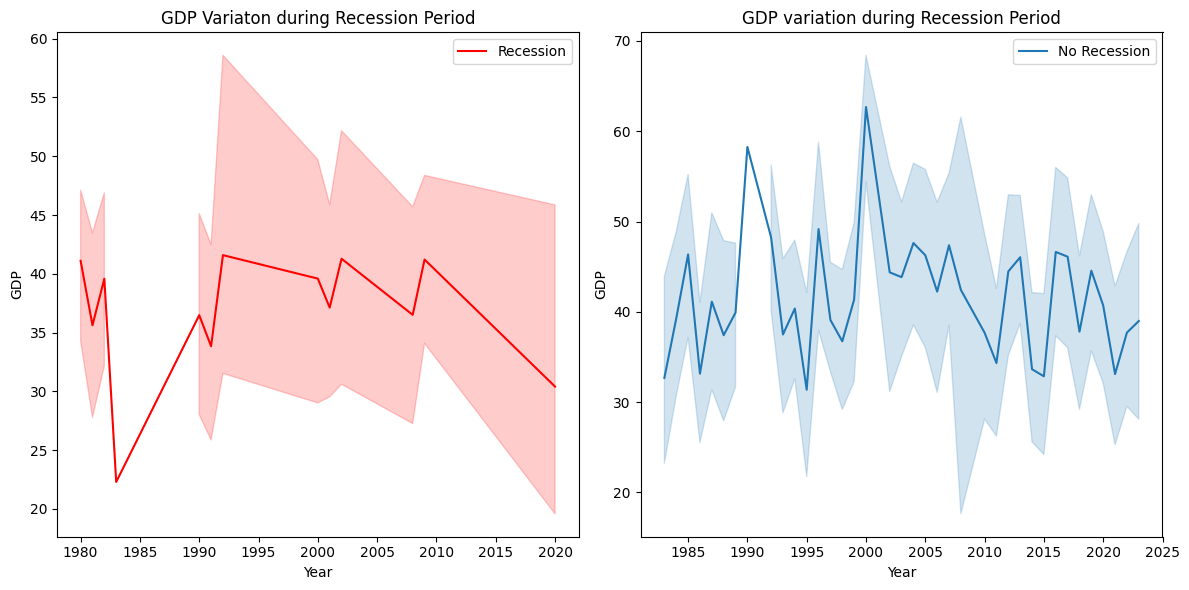

In [25]:
# create one data frame with recession data, one with non recession data
df_rec = df[df['Recession'] == 1]
df_no_rec = df[df['Recession'] == 0]

# create canvas
fig = plt.figure(figsize=(12,6))

# create two plots in a single row
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

# plot recession graph
sns.lineplot(x="Year", y='GDP', data=df_rec, label="Recession", ax=ax0, color="r")
ax0.set_xlabel('Year')
ax0.set_ylabel("GDP")
ax0.set_title("GDP Variaton During Recession Period")

# plot non recession graph
sns.lineplot(x="Year", y="GDP", data=df_no_rec, label="No Recession", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP")
ax1.set_title("GDP Variation During Recession Period")

# makes spacing look better
plt.tight_layout()


### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company<br><br>



---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


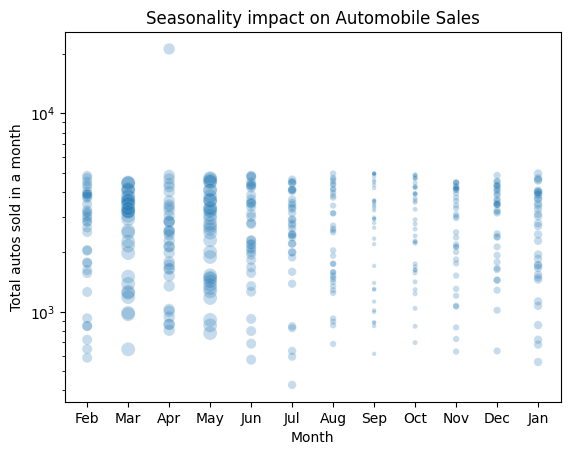

In [26]:
# make scatter plot of autos sold by month, size and color are both seasonality
# I changed the size range so its easier to see the difference in size.
sns.scatterplot(data=df_no_rec, x='Month', y="Automobile_Sales", size="Seasonality_Weight", sizes=(10,100), alpha=0.25, legend=False)

plt.title(
    "Seasonality Impact on Automobile Sales"
)
plt.ylabel("Total autos sold in a month")
# changed the y axis to log scale because the outlier in April made the rest of the graph compressed at the bottom half of the canvas
plt.yscale('log')

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April<br><br>
<span style="color:red">



---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


Text(0.5, 1.0, 'Conumer Confidence & Auto Sales During Recession Periods')

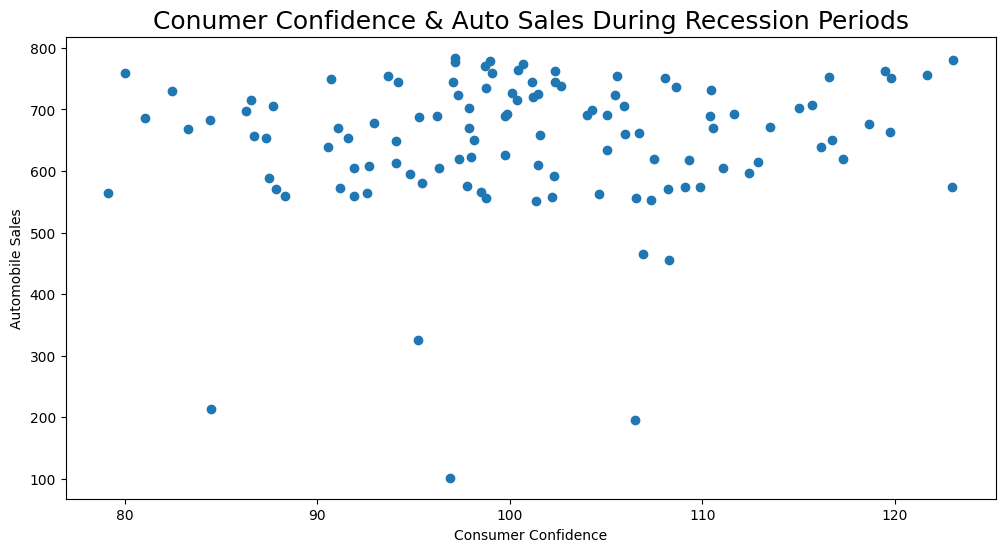

In [413]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df_rec["Consumer_Confidence"], df_rec['Automobile_Sales'])
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.title("Conumer Confidence & Auto Sales During Recession Periods", fontdict={"fontsize": 18})

<details>
<summary>Click here for Solution template</summary>

```python
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

```
</details>



 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'


Text(0.5, 1.0, 'Relationship between Average Vehicle Price and Sales during Recessions')

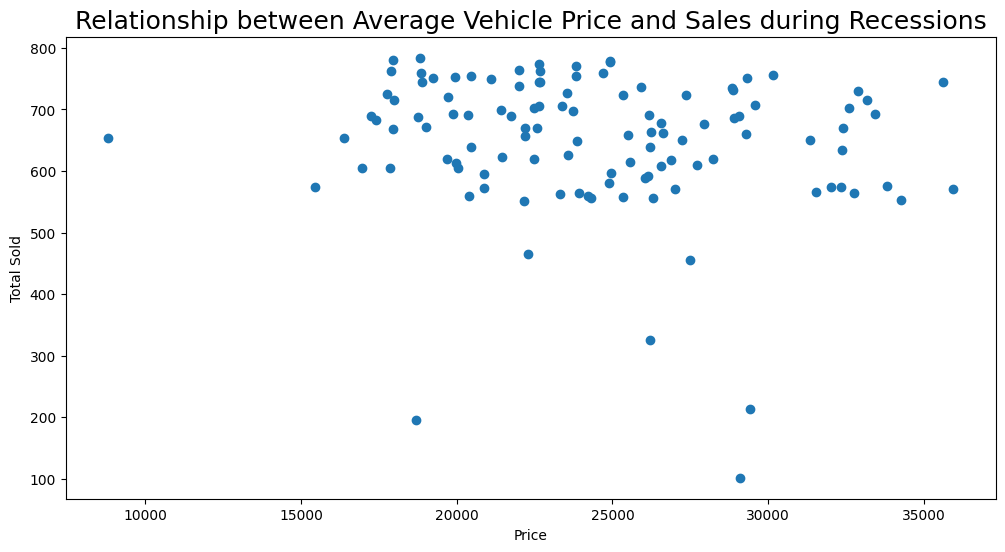

In [414]:
# create canvas
fig = plt.figure(figsize=(12,6))

# use df_rec data frame containing only recession years
plt.scatter(df_rec['Price'], df_rec["Automobile_Sales"])

# update axes
plt.xlabel("Price")
plt.ylabel("Total Sold")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions", fontdict={"fontsize": 18})

### Inference
There is not much relation!<br><br>
<span style="color:red">



----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


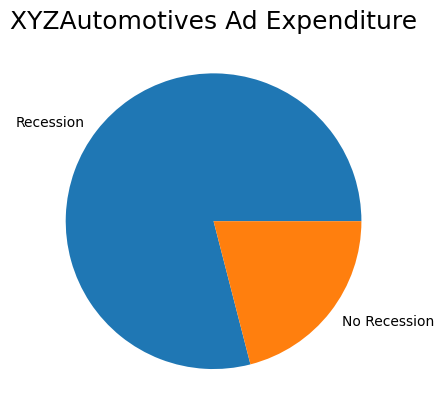

In [125]:
# sum of all non recession rows
df_r_ad = df_no_rec['Advertising_Expenditure'].sum()
# sum of all recession rows
df_ad = df_rec['Advertising_Expenditure'].sum()

# plot pie chart
plt.pie(
    (df_r_ad, df_ad), labels=["Recession", "No Recession"]
)

# add title
plt.title("XYZAutomotives Ad Expenditure", fontdict={"fontsize": 18})

plt.show()

#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


Less than a quarter of ad money spent was during recession years. This company has spent considerably more money on ads during non-recession times.

<details><summary>Inference</summary>
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!<br><br></details>


---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


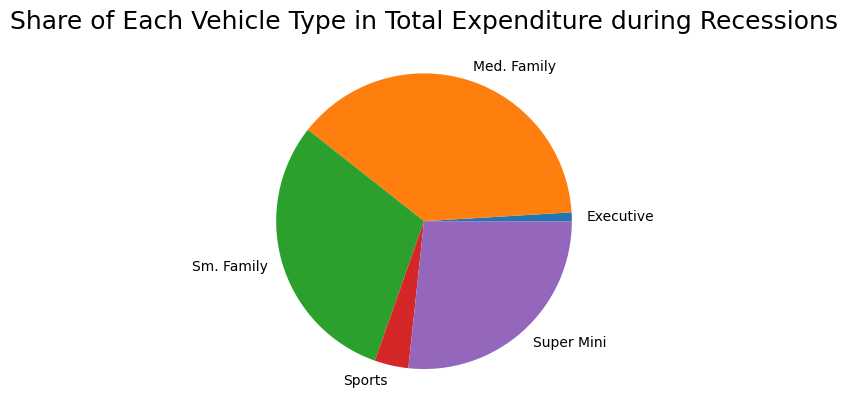

In [134]:
# create data base grouped by vehicle type, sum together ad expenses
df_adv = df_rec.groupby(["Vehicle_Type"])["Advertising_Expenditure"].sum().reset_index()

# plot pie graph, rename labels
plt.pie(df_adv["Advertising_Expenditure"], labels=["Executive", "Med. Family", "Sm. Family", "Sports", "Super Mini"])

# add title
plt.title("Share of Each Vehicle Type in Total Expenditure during Recessions", fontdict={"fontsize": 18})
plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>



----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period


Text(0, 0.5, 'Total automobiles sold')

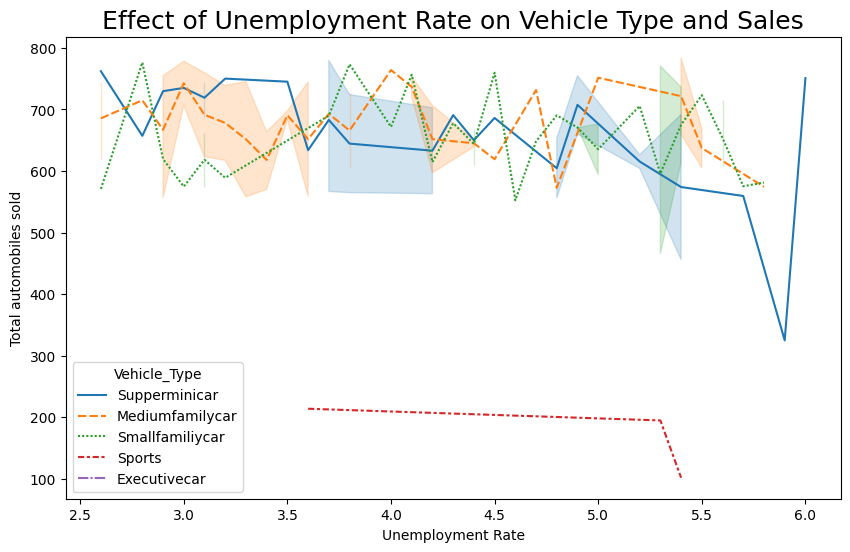

In [146]:
# size canvas
fig = plt.figure(figsize=(10,6))

# create seaborn line plot using data frame with recession values
sns.lineplot(data=df_rec, x='unemployment_rate', y="Automobile_Sales", hue="Vehicle_Type", style="Vehicle_Type")

# update axes
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales", fontdict={"size": 18})
plt.xlabel("Unemployment Rate")
plt.ylabel("Total automobiles sold")

#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


The super mini car has th least inconsistent performance, it dips considerably at the higher unemployment rate and is highest at the lowest ue rate
The medium family car and small family are don't appear to as much as correlation with the ue rate


<details><summary>Inference</summary>
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar<br><br>
</details>


---


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth


In [426]:
df_cities = df_rec.groupby("City")["Automobile_Sales"].sum().reset_index()
# Create a base map centered on the United States


fig = px.choropleth(
    df_cities, 
    geojson=data_json,
    locations={"California": "CA", "New York": "NY", "Illinois": "IL", "Georgia": "GA"},
    locationmode="USA-states",
    color='Automobile_Sales',
    featureidkey= "features.id",
    scope="usa"
)

fig.update_layout(
    title_text="Auto Sales During Recession by Company Office",
    title_x=0.5,
    width=750,
    height=500
)


fig.show()




In [333]:
df_rec["City"].unique()

array(['Georgia', 'New York', 'Illinois', 'California'], dtype=object)

<details><summary>Click for Solution</summary>
    
```python

    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1

```
</details>


# Congratulations! You have completed the lab


## Authors


[Dr. Pooja](author_link)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
2024-01-05|0.2.1|Sowmyaa Gurusamy|Updated the lab instructions|
|2023-06-17|0.2|Pooja|Initial Lab Creation|
|2023-05-01|0.1|Shengkai|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
